<span style="font-size: 40px;">Studying The Impact Of Eating Habits In Student's Lives</span>


1. What data do we have?<br>
We have different types of data to tell us about the eating habits of students and how they affect other aspects of their lives as well as how (if any) other outside factors affect their eating habits. We are working with different answers to various questions which give us data such as how often students eat out a week, the rankings of where the students usually get their food, a scale or personal rating of how healthy they would say their diet is, how often they cook meals in their free time outside of school, and how often they eat out or order food delivery in a month. We will also be working with other questions from the data set that relate to outside or unrelated factors for students in order to see how these outside factors affect these eating habits.


<span style="font-size: 20px;">First we will start by importing all the necessary libraries and reading in the data</span>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import re
df = pd.read_csv("CS105 W24 Survey (Responses) - Form Responses 1.csv")

2. What would we like to know?<br> We would like to know if a student's eating habits affect the amount of time they spend at school. In addition, we would like to know if their living situation affects their eating habits. And lastly we would like to confirm that the more a student eats out, the less they cook at home.

<span style="font-size: 20px">Next, we will start collecting our data (3.)</span>

In [2]:
eating_fastfood_freq = df['How often do you eat out or eat fast food a week?'].value_counts()
eating_halls_freq = df['Where do you usually get your food? (Rank from where you frequent most to least) [Glascow/Lothian (Dining Halls)]'].value_counts().sort_index()
eating_hub_freq = df['Where do you usually get your food? (Rank from where you frequent most to least) [The Hub]'].value_counts().sort_index()
eating_home_freq = df['Where do you usually get your food? (Rank from where you frequent most to least) [At home/bring meal from home]'].value_counts().sort_index()
eating_out_freq = df['Where do you usually get your food? (Rank from where you frequent most to least) [Eating Out - Going and Getting]'].value_counts().sort_index()
eating_delivery_freq = df['Where do you usually get your food? (Rank from where you frequent most to least) [Food Delivery]'].value_counts().sort_index()

Here we collect the students' rankings of how many times they get food from each place, ranging from 1 (Most Frequent) to 5 (Least Frequent)

Now we will plot the distribution of the rankings for each food option from eating at a dining hall to getting food delivered to their home.

[]

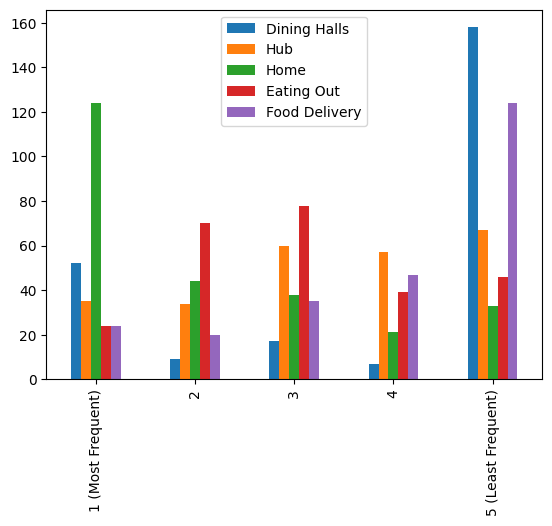

In [3]:
eating_freq = pd.concat([eating_halls_freq, eating_hub_freq, eating_home_freq, eating_out_freq, eating_delivery_freq], axis=1)
eating_graph = eating_freq.plot.bar()
eating_graph.legend(['Dining Halls', 'Hub', 'Home', 'Eating Out', 'Food Delivery'])
eating_graph.plot(kind='bar')


This is the distribution of 1-5s among all preferred methods of eating. We can see that for 1 (Most Frequent), the leading food option is home, meaning that most people chose eating at home as their most frequent method of getting food. On the other hand, people voted 5 (Least Frequent) the most for dining halls, meaning that people ranked eating at the dining halls as the least frequent method of where they get their food.

However, this doesn't tell us much because we see different rankings for each food option so we can't clearly see which method is the one that is the most preferred. To do this, we will first need to find out the distribution of 1s for each category:

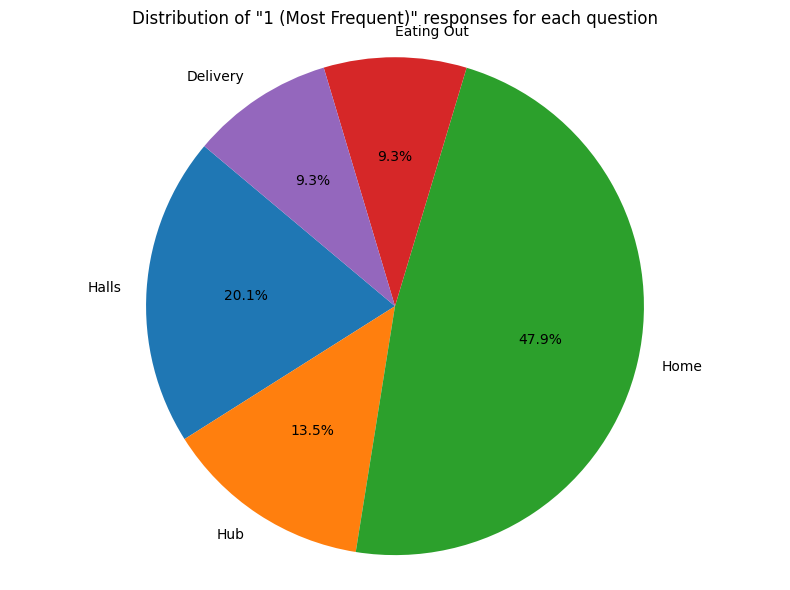

In [4]:
question_column_names = [
    'Where do you usually get your food? (Rank from where you frequent most to least) [Glascow/Lothian (Dining Halls)]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [The Hub]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [At home/bring meal from home]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [Eating Out - Going and Getting]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [Food Delivery]'
]

question_labels = ['Halls', 'Hub', 'Home', 'Eating Out', 'Delivery']
counts_of_ones = []

for question_column_name in question_column_names:
    value_counts = df[question_column_name].value_counts()
    num_of_most_frequent = value_counts.get('1 (Most Frequent)', 0)
    counts_of_ones.append(num_of_most_frequent)

plt.figure(figsize=(8, 6))
plt.pie(counts_of_ones, labels=question_labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of "1 (Most Frequent)" responses for each question')
plt.axis('equal')
plt.tight_layout()
plt.show()


As we can see here, about 48% of people chose eating at home as their most frequent food option, while delivery and eating out have the lowest number of most frequent rankings. However, there is a problem with this that we will discuss shortly, but for now we can take a look at the number of 3s for each category:

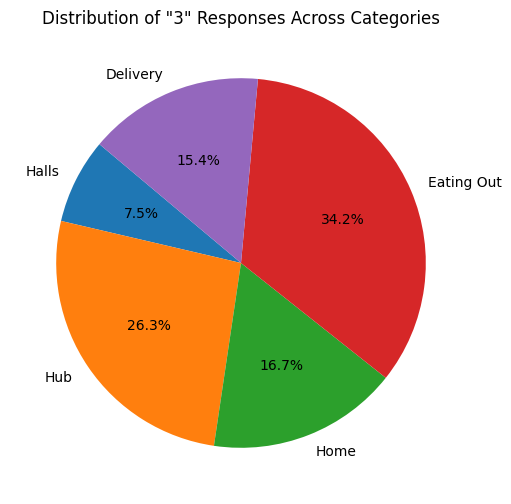

In [5]:
question_column_names = [
    'Where do you usually get your food? (Rank from where you frequent most to least) [Glascow/Lothian (Dining Halls)]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [The Hub]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [At home/bring meal from home]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [Eating Out - Going and Getting]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [Food Delivery]'
]

question_labels = ['Halls', 'Hub', 'Home', 'Eating Out', 'Delivery']
counts_of_threes = []

for question_column_name in question_column_names:
    value_counts = df[question_column_name].value_counts()
    num_of_most_frequent = value_counts.get('3', 0)
    counts_of_threes.append(num_of_most_frequent)


plt.figure(figsize=(8, 6))
plt.pie(counts_of_threes, labels=question_labels, autopct='%1.1f%%', startangle=140)


plt.title('Distribution of "3" Responses Across Categories')

plt.show()


Here we see the frequency of the number of 3s voted in each category by the students. This should tell us more or less the average of what people prefer but in truth, this actually shows the category which was voted as being not too frequent but also not too absent in their diets. In order to get a better picture, we now have to look at the number of 5s for each category of food.

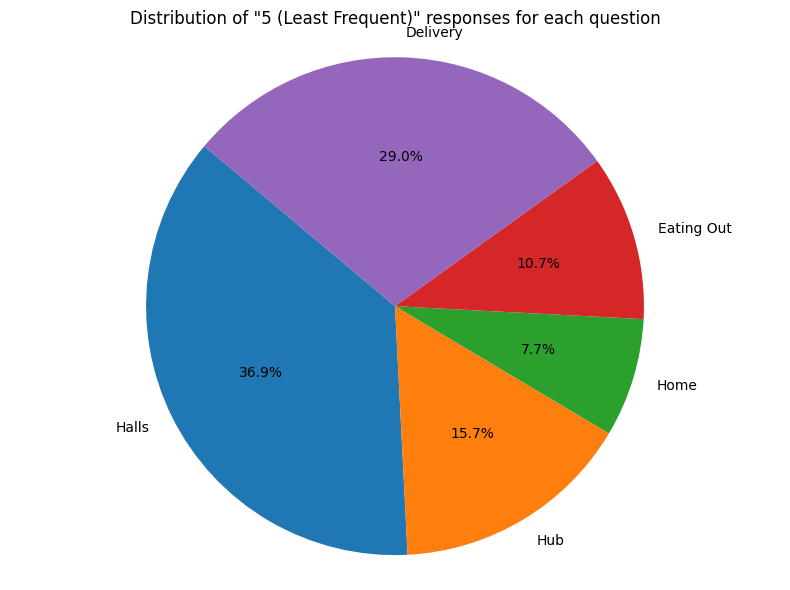

In [6]:
question_column_names = [
    'Where do you usually get your food? (Rank from where you frequent most to least) [Glascow/Lothian (Dining Halls)]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [The Hub]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [At home/bring meal from home]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [Eating Out - Going and Getting]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [Food Delivery]'
]

question_labels = ['Halls', 'Hub', 'Home', 'Eating Out', 'Delivery']
counts_of_fives = []

for question_column_name in question_column_names:
    value_counts = df[question_column_name].value_counts()
    num_of_least_frequent = value_counts.get('5 (Least Frequent)', 0)
    counts_of_fives.append(num_of_least_frequent)

plt.figure(figsize=(8, 6))
plt.pie(counts_of_fives, labels=question_labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of "5 (Least Frequent)" responses for each question')
plt.axis('equal')  
plt.tight_layout()
plt.show()


Now we can see here that the dining halls had the most votes for "5 (Least Frequent)" meaning that people say they rarely eat at the dining halls the most. However, the problem with this is that it doesn't tell us which category was chosen as the most frequent out of all of them and which one was chosen as the least frequent option. In order to do this, we must calculate the average response for each question and that will give us more or less which categories were voted on the most from "least frequent" to "most frequent".

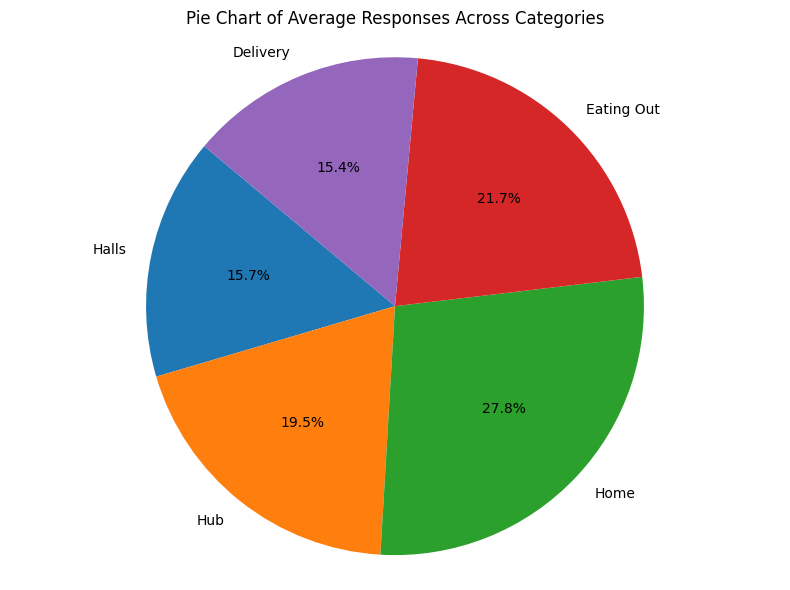

In [7]:
response_mapping = {
    "1 (Most Frequent)": 5,
    "2": 4,
    "3": 3,
    "4": 2,
    "5 (Least Frequent)": 1
}

question_column_names = [
    'Where do you usually get your food? (Rank from where you frequent most to least) [Glascow/Lothian (Dining Halls)]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [The Hub]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [At home/bring meal from home]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [Eating Out - Going and Getting]',
    'Where do you usually get your food? (Rank from where you frequent most to least) [Food Delivery]'
]

question_labels = ['Halls', 'Hub', 'Home', 'Eating Out', 'Delivery']
average_responses = []


for question in question_column_names:
    mapped_responses = df[question].map(response_mapping)
    average_responses.append(mapped_responses.mean())


plt.figure(figsize=(8, 6))
plt.pie(average_responses, labels=question_labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Average Responses Across Categories')
plt.axis('equal') 
plt.tight_layout()
plt.show()


Finally, this pie chart shows the average rankings for each category, or in other words, which option of food is typically preferred by students over others. We see that people tend to eat at home over eating out, eating at the hub, eating at the dining halls, or even getting food delivered to them. We can now clearly see that students primarily eat at home, but for second place we see that students eat out, for third, they eat at the hub, for fourth, they eat at the dining halls, and finally for fifth, they choose to get food delivered to them.

This is a more accurate representation of the most frequent food option between the students because in the previous graph, we saw that eating at the dining halls had the most votes for least frequent option, but in the actualy average rankings, eating at the dining halls was surprisingly preferred over ordering a food delivery.

-------------------------------------------------------------------------------------------------------------------------------------------


<span style="font-size: 25px">Moving on, we now want to study the relationship between how much time on average do people spend at school and how healthy they would rank their diet on a scale from 1-5. To start, we will collect and plot the frequencies for each number voted from 1-5.</span>

Count of 1s: 17
Count of 2s: 56
Count of 3s: 141
Count of 4s: 45
Count of 5s: 4


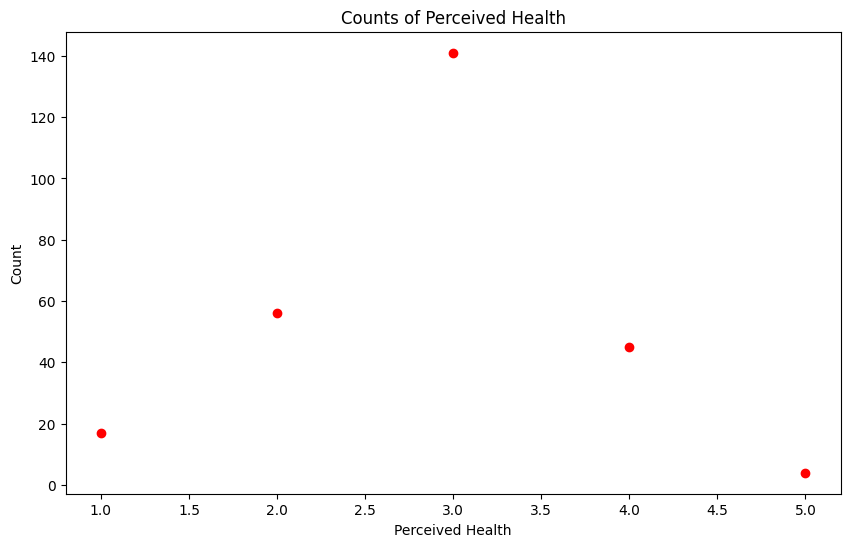

In [8]:
perceived_health_counts = df['On a scale of 1-5 how healthy would you say your diet is? '].value_counts().sort_index()
# print(perceived_health_counts)
count_of_1s = perceived_health_counts.get(1, 0)
count_of_2s = perceived_health_counts.get(2, 0)
count_of_3s = perceived_health_counts.get(3, 0)
count_of_4s = perceived_health_counts.get(4, 0)
count_of_5s = perceived_health_counts.get(5, 0)

print("Count of 1s:", count_of_1s)
print("Count of 2s:", count_of_2s)
print("Count of 3s:", count_of_3s)
print("Count of 4s:", count_of_4s)
print("Count of 5s:", count_of_5s)



plt.figure(figsize=(10, 6)) 
plt.scatter(perceived_health_counts.index, perceived_health_counts.values, color='red')


plt.xlabel('Perceived Health')
plt.ylabel('Count')
plt.title('Counts of Perceived Health')


plt.show()


Here this graph shows a certain number of a student's perceived health and how many students chose this value, meaning how many students ranked their diet health in this way.

4a. Hypotheis: The amount of hours a students spends on average at school per day affects how healthy a student would say their diet is. 

Now we plot the average amount of time someone spends at school vs their alleged diet health.

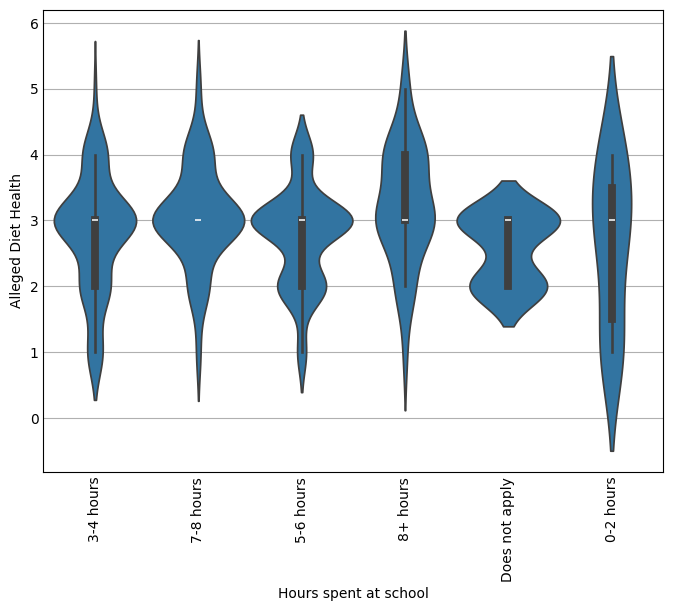

In [9]:
plt.figure(figsize=(8, 6))
plt.style.use('_mpl-gallery')

sns.violinplot(x=df['How much time on average do you spend at school per day '], y=df['On a scale of 1-5 how healthy would you say your diet is? '], data=df, width = 1)

plt.title("")
plt.xlabel("Hours spent at school")
plt.ylabel("Alleged Diet Health")
plt.xticks(rotation = 90)
plt.show()

This is a violin plot that shows the distribution of alleged diet healthiness across different levels of time spent at school per day.

6a. We will be using a chi^2 test in order to see if these two values are actually correlated.

Our null hypothesis is that there is no correlation between the average amount of time people spend at school everyday and how healthy they would rank their diet from a scale of 1-5, and we will be testing this at the 0.05 significance level.

In [10]:
contingency_table = pd.crosstab(df['How much time on average do you spend at school per day '], df['On a scale of 1-5 how healthy would you say your diet is? '])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 value : {chi2}")
print(f"P - Value {p}")
print(f"Degress of Freedom {dof}")
print(f"Expected Contingency Table : ")
print(expected)



Chi2 value : 34.944437675566775
P - Value 0.02040220145962531
Degress of Freedom 20
Expected Contingency Table : 
[[ 0.72200772  2.33590734  5.9034749   1.86872587  0.16988417]
 [ 5.38223938 17.41312741 44.00772201 13.93050193  1.26640927]
 [ 5.38223938 17.41312741 44.00772201 13.93050193  1.26640927]
 [ 2.36293436  7.64478764 19.32046332  6.11583012  0.55598456]
 [ 2.23166023  7.22007722 18.24710425  5.77606178  0.52509653]
 [ 0.91891892  2.97297297  7.51351351  2.37837838  0.21621622]]


5a. Here we see that our P-value is less than our significance level of 0.05, so we can successfully reject the null hypothesis in favor of the alternative hypothesis which suggests that there might be some form of association between the average amount of time people spend at school and how healthy they would say their diet is. Our hypothesis was proven to be correct.

-------------------------------------------------------------------------------------------------------------------------------------------

<span style="font-size: 25px">Next, we will test to see what kind of correlation there will be between the amount of people that live in a household vs the frequency of ordering food delivery.<span>

4b. Our hypothesis is that there will be a high correlation between these two. The more people that live in a household the less delivery will be chosen as a preferred method of getting food. We believe there will be a negative correlation, delivery frequency should go down as the number of roommates/housemates goes up. 

So first we will plot the household size vs the average rank the households of these sizes ranked food delivery to be.

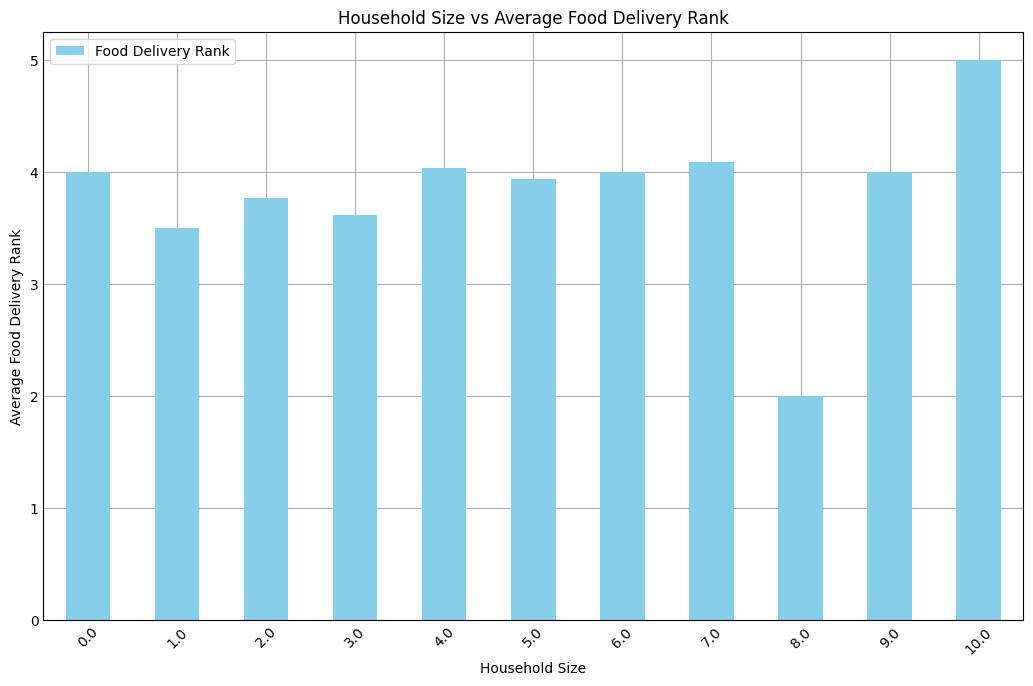

In [11]:
def clean_household_size(value):
    numbers = re.findall(r'\d+', str(value))
    if numbers:
        return int(numbers[0])
    else:
        return None


df['Household Size'] = df['How many people live in your household?'].apply(clean_household_size)

df['Food Delivery Rank'] = df["Where do you usually get your food? (Rank from where you frequent most to least) [Food Delivery]"].str.extract(r'(\d+)').astype(float)

pivot_table = pd.pivot_table(df, values='Food Delivery Rank', index='Household Size', aggfunc='mean')

pivot_table.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('Household Size')
plt.ylabel('Average Food Delivery Rank')
plt.title('Household Size vs Average Food Delivery Rank')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

Here we can see a pretty even spread between all of the household sizes, so we will apply our test now in order to figure out more.

6b. We will use the pearson correlation.

In [12]:
roommates ='How many people live in your household?'
out_stry= 'Where do you usually get your food? (Rank from where you frequent most to least) [Food Delivery]'

df[roommates] = pd.to_numeric(df[roommates], errors = 'coerce')
df.dropna(subset = [roommates], inplace = True)

df[out_stry] = pd.to_numeric(df[out_stry], errors = 'coerce')
df.dropna(subset = [out_stry], inplace = True)

df[out_stry].corr(df[roommates], method = 'pearson')


0.05605896365714921

5b. The end result is an extremely low positive correlation. This means that the two variables have a very slight tendency to increase together. However, the correlation is so low that it could be said that there isn't an association between the number of people in a student's household and the frequency that they order delivery. In summar, our hypothesis was wrong because these values have a slight positive correlation rather than a negative one.

-------------------------------------------------------------------------------------------------------------------------------------------

<span style="font-size: 25px">Finally, we will now test the association with students choosing to eat out vs choosing to eat at home.<span>

Here we want to see if students who eat out actualy tend to eat less at home. This seems obviously true, however, there could be instances where a student eats several meals a day and most of those meals come from home and some of them come from eating out. On the other hand, they could eat several meals a day but have most of those meals be from eating out and some of them being meals from home. Consequently, we will apply a test in order to further investigate this possible correlation.

4c. Our hypothesis is that there will be a negative correlation between the frequency that students eat out and the frequency that students bring food or eat from home. The higher frequency they eat out, the less they eat at home and vice versa. 


Where do you usually get your food? (Rank from where you frequent most to least) [Eating Out - Going and Getting]
3                     38
2                     33
4                     11
5 (Least Frequent)     7
1 (Most Frequent)      6
Name: count, dtype: int64 Where do you usually get your food? (Rank from where you frequent most to least) [At home/bring meal from home]
1 (Most Frequent)     37
3                     23
2                     17
5 (Least Frequent)    13
4                      5
Name: count, dtype: int64


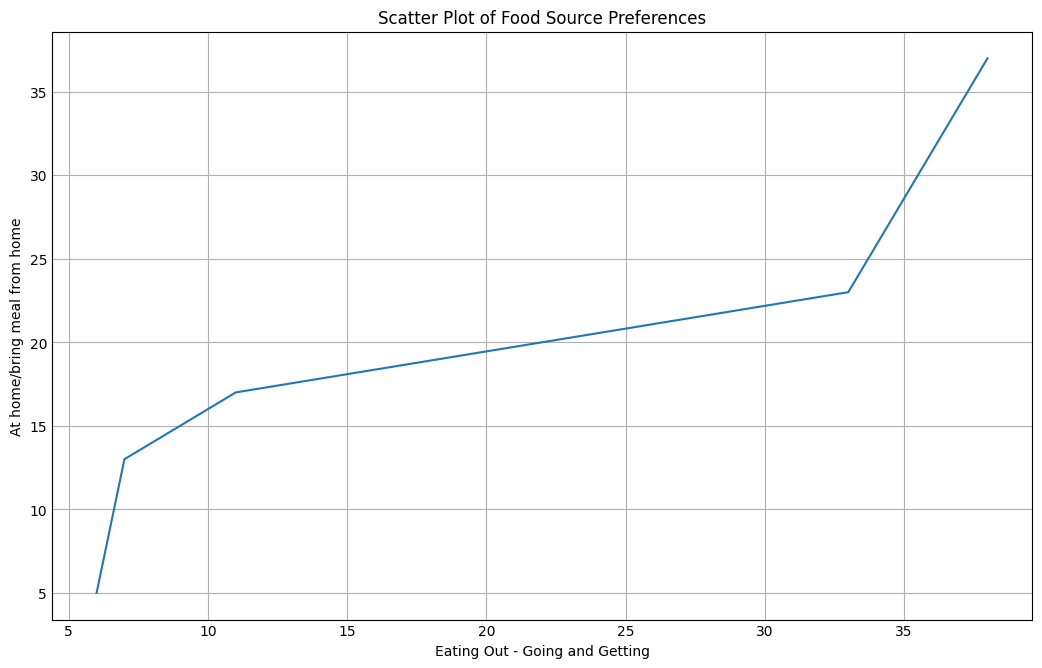

In [13]:
x = df['Where do you usually get your food? (Rank from where you frequent most to least) [Eating Out - Going and Getting]'].value_counts()
y = df['Where do you usually get your food? (Rank from where you frequent most to least) [At home/bring meal from home]'].value_counts()
print(x,y)
plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.title('Scatter Plot of Food Source Preferences')
plt.xlabel('Eating Out - Going and Getting')
plt.ylabel('At home/bring meal from home')
plt.show()

Here we see a line chart showing the frequencies of preferences of eating out vs eating a meal at home. We can see right now that as the number of rankings for eating out gets higher, the number of rankings for eating at home increases as well. But we need to apply a test in order to be sure.

6c. We will be using another pearson test to test for correlation.

In [14]:
eating_out_stry ='Where do you usually get your food? (Rank from where you frequent most to least) [Eating Out - Going and Getting]'
home_stry= 'Where do you usually get your food? (Rank from where you frequent most to least) [At home/bring meal from home]'

df[eating_out_stry] = pd.to_numeric(df[eating_out_stry], errors = 'coerce')
df.dropna(subset = [eating_out_stry], inplace = True)

df[home_stry] = pd.to_numeric(df[home_stry], errors = 'coerce')
df.dropna(subset = [home_stry], inplace = True)

df[eating_out_stry].corr(df[home_stry], method = 'pearson')

0.003246684798225378

5c. Result: Our hypothesis was proven to be false, the frequency that students eat out does not correlate with the the frequency that students eat from home because the peasron correlation test shows us that we do not have any value close to 1 or -1. Our pearson correlation value is 0.003 which indicates a very slight (close to zero) positive correlation, so we can conclude that these variables are not correlated with each other, not even negatively

-------------------------------------------------------------------------------------------------------------------------------------------

Overall Conclusion: After analyzing the data, we have concluded that the average amount of time people spend in school seems to have an association with how healthy they perceive their diet to be. Our chi2 test allowed us to reject the null hypothesis and we could choose the alternate hypothesis, which happened to be our hypothesis. Additionally, we wrongfully predicted that the more people live in a person's househould, the less amount of times food delivery was chosen as their preferred method of getting food. Our tests concluded that there wasn't a correlation between these two values. Finally, we predicted that the more people go and eat out, the less they would eat at home. Similarly, this prediction was proved to be wrong as well, there was a very weak, or almost no correlation at all between these two variables. Overall, our correlation tests have proven one of our hypotheses to be true and the others to be false. Our tests allowed us to come to these conclusions: there is a correlation between the average amount of time people spend in school and how healthy they perceive their diet to be, there is NO correlation between a person's living situation and their preference of food, and there is no negative correlation between eating out and eating at home.

1. What data do you have? (Your answer)
2. What would you like to know? (Your answer)
3. Explore and present the data. (Generate statistics, perform visualizations)
4. Can you state any hypotheses or make predictions? Which tests can you apply to
verify your hypothesis? (Your answer).
5. Test your hypotheses.
6. Draw the overall conclusion.
